# Coding HW Part 1

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
%matplotlib inline

# 데이터 구성
1. 각각의 축마다 np.random.normal을 이용하여 2차원, 3차원, 4차원데이터 생성.
2. 두 개의 data type 중 첫번째 data set은 평균을 모두 0, 두번째 data set은 평균을 5에서 줄여가며 점점 겹쳐지도록 구성.

In [87]:
a = list(zip(np.random.normal(0,1,1000), np.random.normal(0,1,1000), np.random.normal(0,1,1000), np.random.normal(0,1,1000), [1 for _ in range(1000)]))
b1 = list(zip(np.random.normal(5, 1, 1000), np.random.normal(5, 1, 1000), np.random.normal(5, 1, 1000), np.random.normal(5, 1, 1000), [0 for _ in range(1000)]))
b2 = list(zip(np.random.normal(4, 1, 1000), np.random.normal(4, 1, 1000), np.random.normal(4, 1, 1000), np.random.normal(4, 1, 1000), [0 for _ in range(1000)]))
b3 = list(zip(np.random.normal(3, 1, 1000), np.random.normal(3, 1, 1000), np.random.normal(3, 1, 1000), np.random.normal(3, 1, 1000), [0 for _ in range(1000)]))
b4 = list(zip(np.random.normal(2, 1, 1000), np.random.normal(2, 1, 1000), np.random.normal(2, 1, 1000), np.random.normal(2, 1, 1000), [0 for _ in range(1000)]))
b5 = list(zip(np.random.normal(1, 1, 1000), np.random.normal(1, 1, 1000), np.random.normal(1, 1, 1000), np.random.normal(1, 1, 1000), [0 for _ in range(1000)]))

In [90]:
df_a = pd.DataFrame(a)

df_b1 = pd.DataFrame(b1)
df_b2 = pd.DataFrame(b2)
df_b3 = pd.DataFrame(b3)
df_b4 = pd.DataFrame(b4)
df_b5 = pd.DataFrame(b5)

df1 = pd.concat([df_a,df_b1])
df2 = pd.concat([df_a,df_b2])
df3 = pd.concat([df_a,df_b3])
df4 = pd.concat([df_a,df_b4])
df5 = pd.concat([df_a,df_b5])

df1.columns = ['x1', 'x2', 'x3', 'x4', 'type']
df2.columns = ['x1', 'x2', 'x3', 'x4', 'type']
df3.columns = ['x1', 'x2', 'x3', 'x4', 'type']
df4.columns = ['x1', 'x2', 'x3', 'x4', 'type']
df5.columns = ['x1', 'x2', 'x3', 'x4', 'type']

In [92]:
df1.head()

,x1,x2,x3,x4,type
0,-0.220512,0.533724,0.380598,-0.084148,1
1,0.990443,1.321994,-1.662020,-0.133913,1
2,0.955033,-1.024762,1.408427,-0.535897,1
3,0.778725,-2.395575,-0.379370,0.652017,1
4,-0.834488,-1.329976,-0.176095,-1.888499,1


In [93]:
df1.tail()

,x1,x2,x3,x4,type
995,5.046438,5.000984,4.099641,5.934435,0
996,4.404533,4.590395,3.954420,5.978314,0
997,5.209249,4.149489,3.298629,6.717517,0
998,3.923939,4.096725,5.030801,5.266761,0
999,3.709500,6.683073,5.020636,6.444376,0


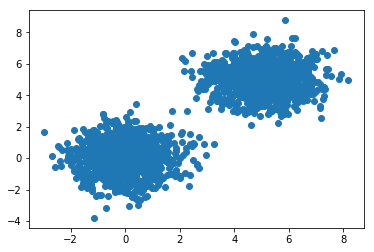

In [95]:
plt.scatter(df1['x1'],df1['x2'])
plt.show()

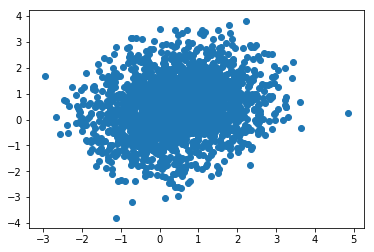

In [113]:
plt.scatter(df5['x1'],df5['x2'])
plt.show()

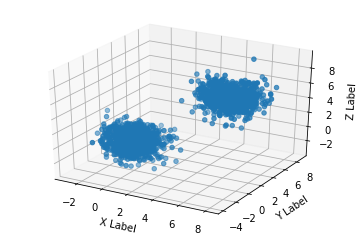

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['x1'], df1['x2'], df1['x3'])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Linear Discriminant Analaysis, Logistic regression, QDA, Naive Bayes 사용해보기

**Logistic Regression** sigmoid와 같은 함수를 통해 y값의 범위를 [0,1] 또는 [-1, 1]과 같이 converge하여 값이 어느쪽에 가까운지에 따라 분류함.
**Linear Discriminant Analaysis** Well Separable한 경우 log(p/1-p)가 error가 나기 때문에 Logistic Regression을 적용하는 게 좋지 않을때. 각 클래스의 분포가 sigma가 일정한 정규분포를 따른다는 가정. Discriminant Score을 계산하여 Relative Probability 계산.
**Quadratic Discriminant Analasis** 정규분포를 따른다는 가정은 LDA와 같지만, sigma가 클래스마다 다른 일반적인 경우, Discriminant Score에서 x^2 term이 남게된다.
**Naive Bayes** LDA의 가정에서 class별로 각각의 feature들이 독립인 경우. 

In [124]:
#각 모델, df, dim에 따라 동작하는 함수 만들기.
def test_model(model, df, dim):
    X=df[['x'+ str(i) for i in range(1, dim+1)]]
    y=df.type
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('confusion matrix: {}'.format(confusion_matrix(y_pred, y_test)))
    print('precision score: {}'.format(precision_score(y_pred, y_test)))
    print('cross validation score: {}'.format(cross_val_score(model, X_train, y_train, cv=5)))
    

In [125]:
result1 = test_model(LinearDiscriminantAnalysis(),df1,2)

confusion matrix: [[298   0]
 [  0 302]]
precision score: 1.0
cross validation score: [ 1.  1.  1.  1.  1.]


In [127]:
result2 = test_model(LinearDiscriminantAnalysis(), df5, 3)

confusion matrix: [[233  67]
 [ 65 235]]
precision score: 0.7781456953642384
cross validation score: [ 0.82206406  0.80071174  0.82857143  0.78853047  0.78853047]


In [126]:
result3 = test_model(QuadraticDiscriminantAnalysis(), df5, 4)

confusion matrix: [[243  46]
 [ 55 256]]
precision score: 0.847682119205298
cross validation score: [ 0.83629893  0.83985765  0.83928571  0.83870968  0.83154122]


In [119]:
result3 = test_model(GaussianNB(), df5, 4)

confusion matrix: [[244  49]
 [ 54 253]]
precision score: 0.8377483443708609


In [123]:
cross_val_score(QuadraticDiscriminantAnalysis(), X_train, y_train, cv=5)

array([ 1.,  1.,  1.,  1.,  1.])

In [ ]:
cross_val_score(QuadraticDiscriminantAnalysis(), X_train, y_train, cv=5)

In [132]:
result3 = test_model(LogisticRegression(), df1, 3)

confusion matrix: [[298   0]
 [  0 302]]
precision score: 1.0
cross validation score: [ 1.  1.  1.  1.  1.]
